# Data-Centric Machine Learning: Improving Model Performance and Understanding Through Dataset Analysis

This notebook contains the code for the paper:

*Hannes Westermann, Jaromir Savelka, Vern R. Walker, Kevin D. Ashley, Karim Benyekhlef. Data-Centric Machine Learning: Improving Model Performance and Understanding Through Dataset Analysis. Forthcoming in Proceedings of the 34th International Conference on Legal Knowledge and Information Systems (JURIX) 2021, 8-10 December, Vilnius, Lithuania.* 

The code should be possible to run on Google Colab. To run it, simply:
* Select one of the datasets in the "Data Imports" section. Execute the code to load the data.
* Run the following cells to split the data, create sentence embedding from the sentences, and create the model.
* Run the experiment cells to carry out the experiments and generate the visualizations.

Created by Hannes Westermann, Cyberjustice Laboratory

# Data imports

Run one of the three following sections to load the annotated data from github.

## VetClaims data

50  decisions  by  the  U.S.  Board  of  Veterans’  Appeals(BVA),  containing  6153sentences tagged with rhetorical roles.

Walker, V. R., et al. “Automatic Classification of Rhetorical Roles for Sentences: Comparing Rule-BasedScripts with Machine Learning.”Proceedings of ASAIL 2019(2019).

In [1]:
!git clone https://github.com/LLTLab/VetClaims-JSON.git

Cloning into 'VetClaims-JSON'...
remote: Enumerating objects: 187, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 187 (delta 20), reused 0 (delta 0), pack-reused 159
Receiving objects: 100% (187/187), 1.85 MiB | 10.65 MiB/s, done.
Resolving deltas: 100% (75/75), done.


In [2]:
import json
import os
from pathlib import Path
from sklearn.model_selection import train_test_split
PWD = Path()

In [3]:
import random

cases = []
allLabels = {}
labelI = 0
decisions_dir = PWD/'VetClaims-JSON'/'BVA Decisions JSON Format'
for fname in os.listdir(decisions_dir):
    case = {"file_name": fname, "sents": [], "labels_text": [], "labels": []}
    with open(decisions_dir/fname) as jsonf:
        dec_data = json.load(jsonf)
    for snt in dec_data['sentences']:
        case["sents"].append(snt['text'])
        curr_lab = snt['rhetRole'][0]
        case["labels_text"].append(curr_lab)
        if curr_lab in allLabels:
            case["labels"].append(allLabels[curr_lab])
        else:
            allLabels[curr_lab] = labelI
            labelI += 1
            case["labels"].append(allLabels[curr_lab]) 
    cases.append(case)
unique_labels = [k for k,v in allLabels.items()]
num_labels = len(unique_labels)

dataset_name = "BVA"

## Supreme Court of India

50  opinions  of  the  Supreme  Court  of  India (ISC), containing  9,380  sentences tagged with the rhetorical roles of the sentences.

Bhattacharya, P., Paul, S., Ghosh, K., Ghosh, S. & Wyner, A. “Identification of Rhetorical Roles ofSentences in Indian Legal Judgments.” Jurix 2019. pp. 3-12 (2019).

In [ ]:
!git clone https://github.com/Law-AI/semantic-segmentation.git

In [ ]:
import numpy as np
import os
import pandas as pd
from pathlib import Path
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
PWD = Path()
TEXT_DIR = PWD/'semantic-segmentation'/'data'/'text'

In [ ]:
text, labels, file_names = [], [], []
cases = []
allLabels = {}
labelI = 0
def process_label(label):
    return label.strip().replace(" ", "_")

for file_name in os.listdir(TEXT_DIR):
    file_path = TEXT_DIR/file_name
    with open(file_path) as txt_f:
        case = {"file_name": file_name, "sents": [], "labels_text": [], "labels": []}
        lines = txt_f.readlines()
        for i in range(len(lines)):
            curr_seq, curr_lab = lines[i].split('\t')
            curr_lab = curr_lab[:-1]
            case["sents"].append(curr_seq)
            case["labels_text"].append(curr_lab)
            if curr_lab in allLabels:
                case["labels"].append(allLabels[curr_lab])
            else:
                allLabels[curr_lab] = labelI
                labelI += 1
                case["labels"].append(allLabels[curr_lab])
        cases.append(case)
unique_labels = [k for k,v in allLabels.items()]
num_labels = len(unique_labels)

print (cases[0])
dataset_name = "ISC"

In [ ]:
print (allLabels)

## Statutory interpretation

880 sentences from court opinions mentioning vague statutory terms(StatInt), tagged with usefulness of sentences for statutory interpretation

Savelka, J., Xu, H., & Ashley, K. “Improving Sentence Retrieval from Case Law for Statutory Interpre-tation.”Proc. 17th Int’l Conf. on Artificial Intelligence and Law, pp. 113-122. (2019).

In [ ]:
!git clone https://github.com/jsavelka/statutory_interpretation.git
!unzip statutory_interpretation/iev.zip
!unzip statutory_interpretation/cbp.zip
!unzip statutory_interpretation/ip.zip

In [ ]:
from pathlib import Path
PWD = Path()

IEV_JSON = PWD/'iev_sentence.json'
CBP_JSON = PWD/'cbp_sentence.json'
IP_JSON = PWD/'ip_sentence.json'

In [ ]:
sent_id, text, labels, document = [], [], [], []
import json
import pandas as pd

with open(IEV_JSON) as iev_f, open(CBP_JSON) as cbp_f, open(IP_JSON) as ip_f:
    #iev_data = json.load(iev_f)
    cbp_data = json.load(cbp_f)
    #ip_data = json.load(ip_f)
    json_data = {}
    #json_data.update(iev_data)
    json_data.update(cbp_data)
    #json_data.update(ip_data)  
print (json_data)


for snt_id, snt_data in enumerate(json_data.values()):
    sent_id.append(snt_id)
    text.append(snt_data['text'])
    labels.append(snt_data['label'])
    document.append(snt_data['case_id'])

data_df = pd.DataFrame({
    'sent_id': sent_id,
    'text': text,
    'label': labels,
    'document': document
})



data_df = data_df.astype({'label': 'category'})
data_df["label_num"] = data_df["label"].cat.codes

print(data_df.shape, '\n')
print(data_df.label.value_counts(), '\n')
print(data_df.iloc[0])

In [ ]:
from collections import defaultdict


cases = []
for doc_name in data_df["document"].unique():
    case_df = data_df.loc[data_df['document'] == doc_name]
    case = {"file_name": doc_name, "sents": [], "labels_text": [], "labels": []}
    case["sents"] = case_df["text"].values
    case["labels_text"] = case_df["label"].values
    case["labels"] = list(case_df["label_num"].values)
    #case["fold"] = case_df["fold"].values[0]
    #case["lang"] = case_df["lang"].values[0]
    #case["dataset"] = case_df["dataset"].values[0]
    cases.append(case)

In [ ]:
unique_labels = list(data_df["label"].cat.categories)
num_labels = data_df["label"].nunique()
print (unique_labels, num_labels)
dataset_name = "StatInt"

# Splits

Split the data into train and val set, display information about the distributions of labels.

In [4]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(cases, test_size=0.2, shuffle=True, random_state=42)

In [5]:
import collections


def getLength(cases):
    snts = 0
    for case in cases:
        for sents in case["sents"]:
            snts += 1
    return snts
print (f"Train data: {len(train)} documents, {getLength(train)} sentences.")
print (f"Val data: {len(val)} documents, {getLength(val)} sentences.")

def getCounter(cases):
    lst = []
    for case in cases:
        for l in case["labels"]:
            lst.append(l)
    c = collections.Counter(lst)
    return c, len(lst)

c, num_sents = getCounter(cases)
print (f"Total sentences: {num_sents}")
print ("---------")
print ("Label distributions: ")
x = sorted(c.items(), key=lambda pair: pair[0], reverse=False)
for item in x:
    print (f"{item[0]}: ({unique_labels[item[0]]}) - {item[1]} - {round(item[1]/num_sents, 4)}")

Train data: 40 documents, 4775 sentences.
Val data: 10 documents, 1378 sentences.
Total sentences: 6153
---------
Label distributions: 
0: (Sentence) - 477 - 0.0775
1: (FindingSentence) - 490 - 0.0796
2: (ReasoningSentence) - 710 - 0.1154
3: (LegalRuleSentence) - 938 - 0.1524
4: (CitationSentence) - 1118 - 0.1817
5: (EvidenceSentence) - 2420 - 0.3933


# Create embeddings

Use the Google Universal Sentence encoder to create embeddings of the sentences in the chosen dataset.

In [6]:
from absl import logging

import tensorflow as tf

import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
model2 = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model2(input)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [7]:
%%time
from numpy import argmax
import math  

for t, case in enumerate(cases):
    sents = case["sents"]
    message_embeddings = embed(sents)
    embs = np.array(message_embeddings).tolist()
    case["embs"] = embs
    print (f"Created embeddings for case {t+1}/{len(cases)}")

Created embeddings for case 1/50
Created embeddings for case 2/50
Created embeddings for case 3/50
Created embeddings for case 4/50
Created embeddings for case 5/50
Created embeddings for case 6/50
Created embeddings for case 7/50
Created embeddings for case 8/50
Created embeddings for case 9/50
Created embeddings for case 10/50
Created embeddings for case 11/50
Created embeddings for case 12/50
Created embeddings for case 13/50
Created embeddings for case 14/50
Created embeddings for case 15/50
Created embeddings for case 16/50
Created embeddings for case 17/50
Created embeddings for case 18/50
Created embeddings for case 19/50
Created embeddings for case 20/50
Created embeddings for case 21/50
Created embeddings for case 22/50
Created embeddings for case 23/50
Created embeddings for case 24/50
Created embeddings for case 25/50
Created embeddings for case 26/50
Created embeddings for case 27/50
Created embeddings for case 28/50
Created embeddings for case 29/50
Created embeddings for 

# Model

Run all cells to load the utility functions that create and evaluate the model.

In [8]:
# Reset seed for consistent results.
from numpy.random import seed

import tensorflow as tf


def resetSeed():
    tf.compat.v1.set_random_seed(1)
    seed(1)

In [9]:
from __future__ import print_function
import numpy as np

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional, SpatialDropout1D, BatchNormalization
from keras.datasets import imdb
import keras
import keras.backend as K
from keras.callbacks import *
from keras.optimizers import *
import os


max_features = 20000
maxlen = 100
batch_size = 32

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                            patience=2, min_lr=1e-7, verbose=1)
checkpoint_filepath = './tmp/checkpoint.h5'
earlyStopping = EarlyStopping(monitor='val_accuracy', patience=30, verbose=1, mode='auto')
mcp_save = ModelCheckpoint(checkpoint_filepath, save_best_only=True, monitor='val_accuracy', mode='max', save_weights_only=True,)

def getData(cases):
    X,y = [],[]
    for case in cases:
        for i, sent in enumerate(case['embs']):
            X.append(sent)
            lst = [0]*num_labels
            lst[case["labels"][i]] = 1
            y.append(lst)
    X = np.array(X)
    y = np.array(y)
    return X,y

def getModel():

    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(512,)))
    model.add(Dense(num_labels, activation='softmax'))
    model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])



    return model

from numpy import argmax
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def trainReturnPreds(train, val):
    resetSeed()
    model = getModel()
    x_train, y_train = getData(train)
    mcp_save = ModelCheckpoint(checkpoint_filepath, save_best_only=True, monitor='val_accuracy', mode='max', save_weights_only=True,)
    earlyStopping = EarlyStopping(monitor='val_accuracy', patience=30, verbose=1, mode='auto')
    history = model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=100,
            validation_split=0.1,
            callbacks=[ mcp_save, earlyStopping])
    model.load_weights(checkpoint_filepath)
    x_test, y_test = getData(val)
    preds = model.predict(x_test)
    all_preds = []
    all_true = []
    for i,pred in enumerate(preds):
        all_preds.append(argmax(pred))
        all_true.append(argmax(y_test[i]))
    return all_preds, all_true

def startTraining(train, val):
    all_preds, all_true = trainReturnPreds(train, val)
    return classification_report(all_true, all_preds, target_names = unique_labels, output_dict = True)

def trainPlot(train, val):
    all_preds, all_true = trainReturnPreds(train, val)
    print (unique_labels)
    cm = confusion_matrix(all_true, all_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=unique_labels
                              )
    disp.plot(xticks_rotation="vertical", values_format="d") 
    print(classification_report(all_true, all_preds, target_names = unique_labels))

# Experiments

## Required utility functions

In [10]:
# Utility functions to save results to a file, load results from file for easier plotting.

import json
!mkdir results
!mkdir images
def save_results(experiment, ds, results):
    with open(f"results/{experiment}-{ds}.json", "w") as outfile:
        json.dump(results, outfile)

def load_results(experiment, ds):
    print (f"Loading results/{experiment}-{ds}.json")
    with open(f"results/{experiment}-{ds}.json", "r") as infile:
        return json.load(infile)

In [13]:
# Function to rename label

def mapLabel(label):
    if label == "Sentence":
        return "Other"
    else:
        return label

!mkdir "tmp"

## E1 - Sample-Size Sensitivity

In [14]:
%%time
if dataset_name == "StatInt":
    bucketSize = 10
else:
    bucketSize = 1

from IPython.display import clear_output
trainCases = []
results = []
for i in range(int(len(train)/bucketSize)):
    trainCases += train[i:i+bucketSize]
    print (f"Starting training on {i}/{int(len(train)/bucketSize)}")
    res = startTraining(trainCases, val)
    print (res["weighted avg"])
    results.append(res)
print (results)
clear_output()
save_results("E1", dataset_name, results)

CPU times: user 12min 14s, sys: 1min 22s, total: 13min 36s
Wall time: 10min 6s


Loading results/E1-BVA.json


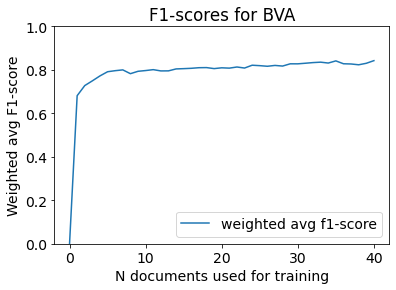

In [15]:
%matplotlib inline

results = load_results("E1", dataset_name)
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

import numpy as np

fig = plt.figure()
ax = plt.axes()



resultsList = [0]+[dat['weighted avg']['f1-score'] for dat in results]
ax.plot(resultsList, label="weighted avg f1-score");
ax.set_ylim([0,1])
plt.legend()

plt.ylabel("Weighted avg F1-score")
plt.xlabel("N documents used for training")
plt.title(f'F1-scores for {dataset_name}')
plt.legend(loc="lower right")
plt.savefig(f'images/E1-{dataset_name}-overall')

Loading results/E1-BVA.json


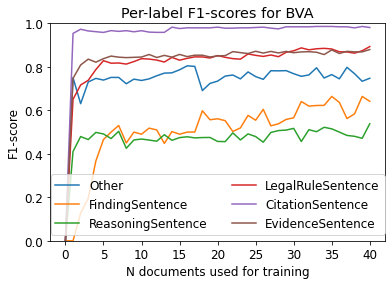

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
results = load_results("E1", dataset_name)
import numpy as np

fig = plt.figure()
ax = plt.axes()
ax.set_ylim([0,1])

plt.ylabel("F1-score")
plt.xlabel("N documents used for training")
plt.title(f'Per-label F1-scores for {dataset_name}')

for senttype in unique_labels:
    resultsList = [0]+[dat[senttype]['f1-score'] for dat in results]
    ax.plot(resultsList, label = mapLabel(senttype));
if dataset_name == "BVA":
    plt.legend(loc="lower center", ncol=2)
elif dataset_name == "StatInt":
    plt.legend(loc="upper left")
else:
    plt.legend(loc="upper left", ncol = 2)
plt.savefig(f'images/E1-{dataset_name}-labels')

## E2 - Split Sensitivity

In [17]:
%%time
bucketSize = 1

from sklearn.model_selection import KFold

results = []
kf = KFold(n_splits=5, shuffle=True, random_state = 42)
for train_index, test_index in kf.split(cases):
    trainCases = [cases[i] for i in train_index]
    valCases = [cases[i] for i in test_index]
    res = startTraining(trainCases, valCases)
    results.append(res)
print (results)
save_results("E2", dataset_name, results)
    
clear_output()

CPU times: user 3min 3s, sys: 23 s, total: 3min 26s
Wall time: 2min 13s


Loading results/E2-BVA.json


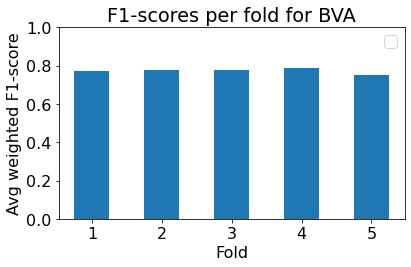

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
results = load_results("E2", dataset_name)
plt.rcParams.update({'font.size': 16})
import numpy as np

import matplotlib.pyplot as plt
import numpy as np



labels = list(range(1,6))
x = np.arange(len(labels))  
width = 0.5  
fig, ax = plt.subplots()
ax.set_ylim([0,1])

resultsList = [dat['macro avg']['f1-score'] for dat in results]
ax.bar(x, resultsList, width)


ax.set_ylabel('Avg weighted F1-score')
ax.set_xlabel('Fold')
ax.set_title(f'F1-scores per fold for {dataset_name}')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.savefig(f'images/E2-{dataset_name}-overall')

Loading results/E2-BVA.json


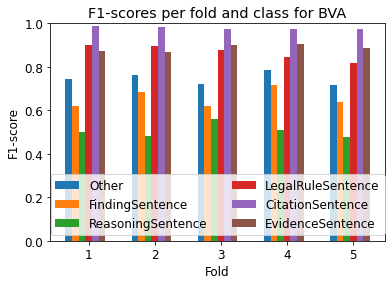

In [19]:
import matplotlib.pyplot as plt
import numpy as np
results = load_results("E2", dataset_name)
plt.rcParams.update({'font.size': 12})

labels = list(range(1,6))
x = np.arange(len(labels))  
width = 0.1  

fig, ax = plt.subplots()

for i, senttype in enumerate(unique_labels):
    resultsList = [dat[senttype]['f1-score'] for dat in results]
    rects = ax.bar(x + width*i-num_labels*width*0.5, resultsList, width, label=mapLabel(senttype))

ax.set_ylim([0,1])
ax.set_ylabel('F1-score')
ax.set_xlabel('Fold')
ax.set_title(f'F1-scores per fold and class for {dataset_name}')
ax.set_xticks(x)
ax.set_xticklabels(labels)


if dataset_name == "BVA":
    plt.legend(loc="lower center", ncol=2)
elif dataset_name == "StatInt":
    plt.legend(loc="lower left")
else:
    plt.legend(loc="upper center", ncol = 2)

plt.savefig(f'images/E2-{dataset_name}-labels')

## E3 - Error Sensitivity

In [20]:
%%time

#Ranodmly mutate
import copy
import random

from sklearn.model_selection import KFold

results = []
jumpSize = 10

for i in range(11):
    trainCases = copy.deepcopy(train)
    changes = 0
    for case in trainCases:
        for li in range(len(case["labels"])):
            if random.randint(0,99)<i*jumpSize:
                currLabel = case["labels"][li]
                possibleLabels = list(range(num_labels))
                possibleLabels.remove(currLabel)
                newLabel = random.choice(possibleLabels)
                case["labels"][li] = newLabel
                changes += 1
    print (f"Performed {changes} changes.")
    res = startTraining(trainCases, val)
    results.append(res)
print (results)

mutation_mode = "random"
save_results("E3-"+mutation_mode, dataset_name, results)
    
clear_output()

CPU times: user 5min 36s, sys: 38.4 s, total: 6min 14s
Wall time: 4min 10s


Loading results/E3-random-BVA.json


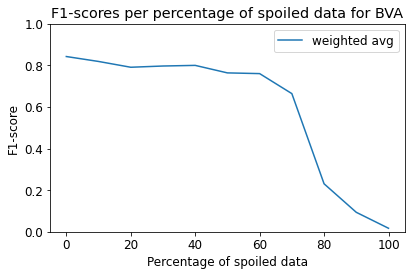

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
results = load_results("E3-"+mutation_mode, dataset_name)
import numpy as np
plt.rcParams.update({'font.size': 12})

fig = plt.figure()
ax = plt.axes()

resultsList = [dat['weighted avg']['f1-score'] for dat in results]
xs = [i*jumpSize for i in range(len(resultsList))]

ax.plot(xs, resultsList, label="weighted avg");
ax.set_ylabel('F1-score')
ax.set_xlabel('Percentage of spoiled data')
ax.set_title(f'F1-scores per percentage of spoiled data for {dataset_name}')
ax.set_ylim([0,1])
ax.legend()

fig.tight_layout()
plt.savefig(f'images/E3-{dataset_name}-{mutation_mode}-overall')

Loading results/E3-random-BVA.json


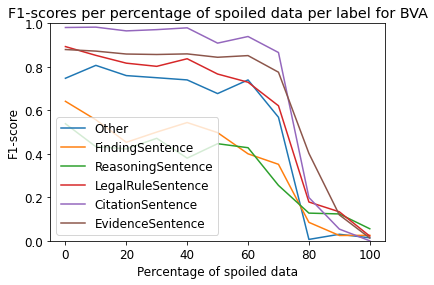

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
results = load_results("E3-"+mutation_mode, dataset_name)
import numpy as np
plt.rcParams.update({'font.size': 12})


fig = plt.figure()
ax = plt.axes()

ax.set_ylabel('F1-score')
ax.set_xlabel('Percentage of spoiled data')
ax.set_title(f'F1-scores per percentage of spoiled data per label for {dataset_name}')


ax.set_ylim([0,1])

for senttype in unique_labels:
    resultsList = [dat[senttype]['f1-score'] for dat in results]
    xs = [i*jumpSize for i in range(len(resultsList))]
    ax.plot(xs, resultsList, label = mapLabel(senttype));
if mutation_mode == "random":
    if dataset_name == "BVA":
        plt.legend(loc="lower left")
    elif dataset_name == "StatInt":
        plt.legend(loc="upper right", ncol=2)
    else:
        plt.legend(loc="upper left", ncol = 2)
else:
    if dataset_name == "BVA":
        plt.legend(loc="upper right")
    elif dataset_name == "StatInt":
        plt.legend(loc="upper right")
    else:
        plt.legend(loc="upper left", ncol = 2)

plt.savefig(f'images/E3-{dataset_name}-{mutation_mode}-labels')